<a href="https://colab.research.google.com/github/adithya-prabhu-22/Machine_learning_algos_sklearn/blob/main/naive_base_spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Model Evaluation Summary:
# After removing ~25% of the features based on low correlation with the target variable,
# model accuracy increased slightly (from 82% to 85.5%).
# However, the simplified model reduced complexity and improved generalization.
# It also reduced the misclassification of genuine emails as spam (false positives),
# at the cost of a slight increase in misclassified spam emails as valid (false negatives).

# Depending on the use-case:
# - Choose the reduced-feature model if minimizing false alarms (classifying valid emails as spam) is more important.
# - Choose the full-feature model if maximizing detection of all spam emails is more critical.

#1 → Spam

#0 → Not Spam (Ham)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
df = pd.read_csv(url, header=None)
print(df.head())
df.info()
df.describe()

     0     1     2    3     4     5     6     7     8     9   ...    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   

      49   50     51     52     53     54   55    56  57  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191   1  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  -------------- 

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

spam_count = df.iloc[:, -1].value_counts()
print(spam_count)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

57
0    2788
1    1813
Name: count, dtype: int64

Confusion Matrix:
 [[387 144]
 [ 21 369]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.73      0.82       531
           1       0.72      0.95      0.82       390

    accuracy                           0.82       921
   macro avg       0.83      0.84      0.82       921
weighted avg       0.85      0.82      0.82       921

Accuracy: 0.8208469055374593


Text(0.5, 1.0, 'Confusion Matrix')

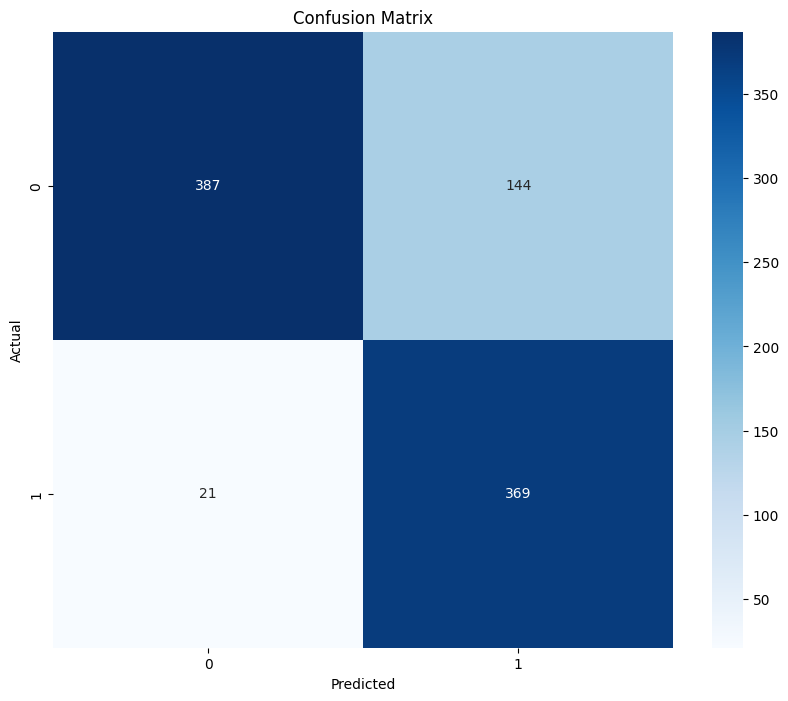

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

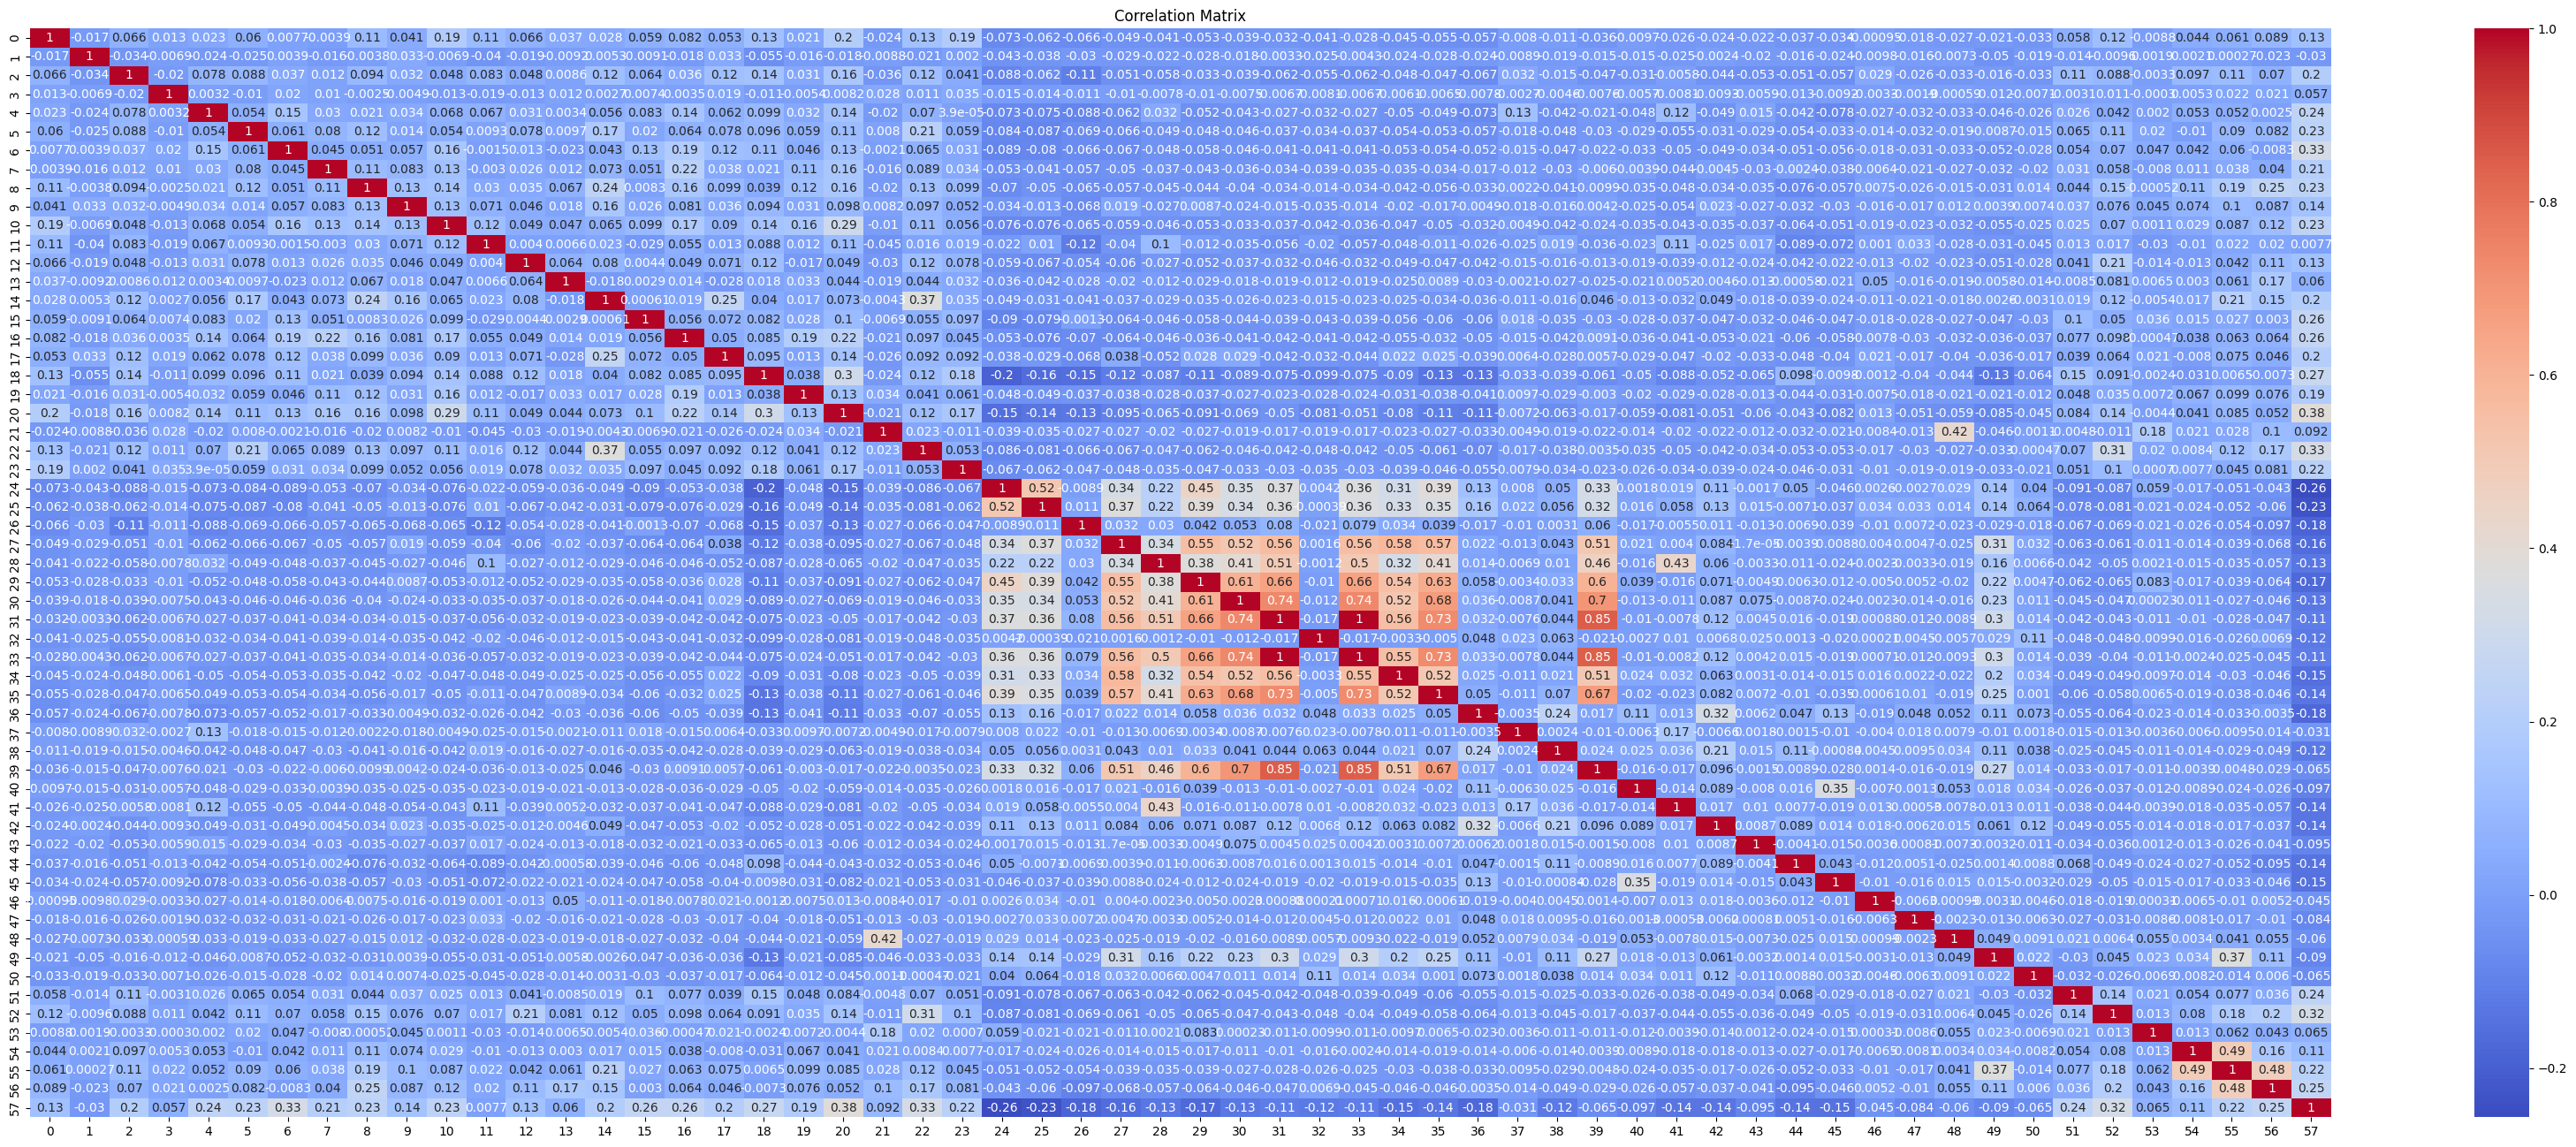

In [6]:
plt.figure(figsize=(42, 16))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
dfnew=df.drop(columns=df.columns[27:49],axis=1)

display(dfnew.head())

,0,1,2,3,4,5,6,7,8,9,...,26,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [15]:
X2 = dfnew.iloc[:, :-1]
y2 = dfnew.iloc[:, -1]


X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

model2 = GaussianNB()
model2.fit(X_train2, y_train2)

y_pred2 = model2.predict(X_test2)


print("\nConfusion Matrix:\n", confusion_matrix(y_test2, y_pred2))
print("\nClassification Report:\n", classification_report(y_test2, y_pred2))
print("Accuracy:", accuracy_score(y_test2, y_pred2))


Confusion Matrix:
 [[500  31]
 [111 279]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.88       531
           1       0.90      0.72      0.80       390

    accuracy                           0.85       921
   macro avg       0.86      0.83      0.84       921
weighted avg       0.85      0.85      0.84       921

Accuracy: 0.8458197611292074


Text(0.5, 1.0, 'Confusion Matrix')

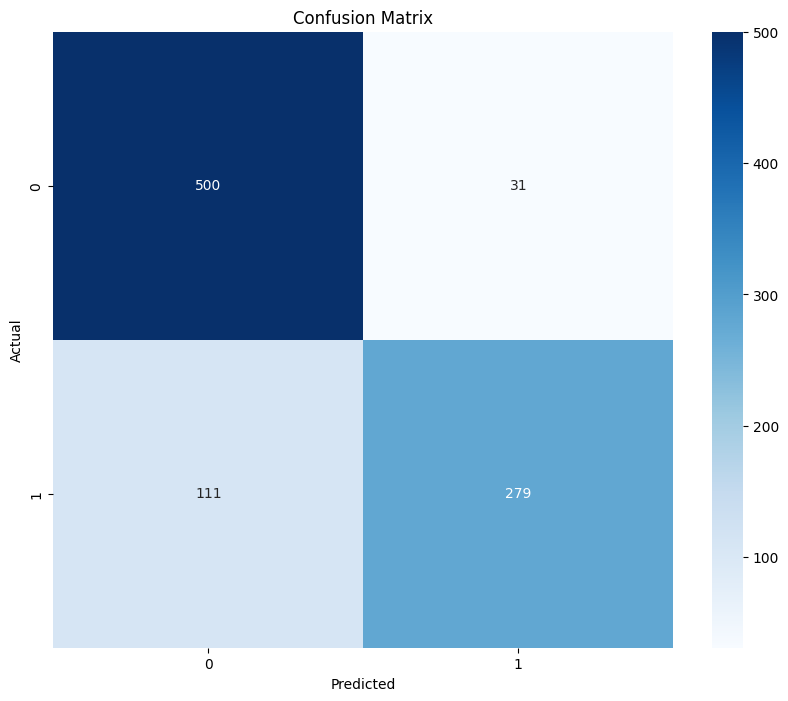

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test2, y_pred2), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

Model 1 Performance on Test Data:
Accuracy: 0.8208469055374593
Precision: 0.7192982456140351
Recall: 0.9461538461538461
F1 Score: 0.8172757475083057

Model 2 Performance on Test Data:
Accuracy: 0.8458197611292074
Precision: 0.9
Recall: 0.7153846153846154
F1 Score: 0.7971428571428572


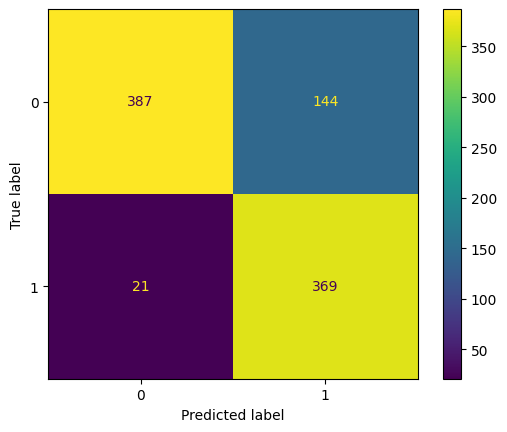

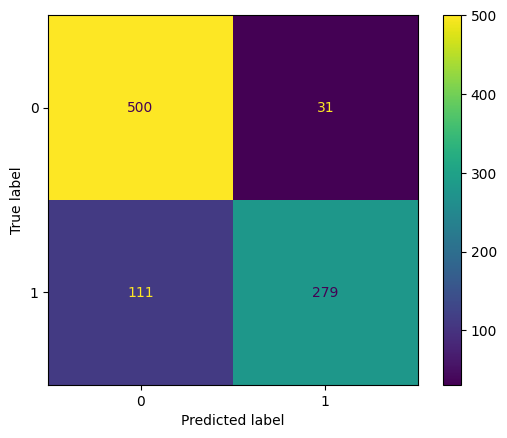

In [21]:
#comparing both models performance on same test dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Model 1 Performance on Test Data:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


X_test_model2 = X_test.drop(columns=df.columns[27:49])
y_pred2_on_test = model2.predict(X_test_model2)

print("\nModel 2 Performance on Test Data:")
print("Accuracy:", accuracy_score(y_test, y_pred2_on_test))
print("Precision:", precision_score(y_test, y_pred2_on_test))
print("Recall:", recall_score(y_test, y_pred2_on_test))
print("F1 Score:", f1_score(y_test, y_pred2_on_test))

from sklearn.metrics import RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

ConfusionMatrixDisplay.from_estimator(model2, X_test2, y_test2)


In [20]:
#this confirms both the models were verified/tested on the same dataset
spam_count2= y_test2.value_counts()
print(spam_count2)
spam_count3= y_test.value_counts()
print(spam_count3)

57
0    531
1    390
Name: count, dtype: int64
57
0    531
1    390
Name: count, dtype: int64
